In [1]:
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Flatten,Dense, BatchNormalization,Convolution2D , Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import relu


In [27]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import imageio


In [2]:
rain_data_path = 'data/train'
validation_data_path = 'data/test'

"""
Parameters
"""
img_width, img_height = 150, 150
batch_size = 32
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 3
lr = 0.0004

model = Sequential()
model.add(Conv2D(nb_filters1, conv1_size, conv1_size, activation = 'relu' , input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters2, conv2_size,conv2_size,activation = 'relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=lr),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./data',
                                                 target_size = (150, 150),
                                                 batch_size = 7,
                                                 #class_mode = 'binary')
                                                )
#test_set = test_datagen.flow_from_directory('C:/Users/epatdeb/TensorFlow_Project_1/CNN_CatsDogs/Pets_cnn/test_set',
#                                            target_size = (64, 64),
#                                            batch_size = 32,
#                                            class_mode = 'binary')


Found 83 images belonging to 3 classes.


In [4]:
# I have already run the training model as it take some time. Original epoch #25
model.fit(training_set,
                         #steps_per_epoch = 19998,
                         epochs = 25, 
                         #validation_data = test_set,
                         #validation_steps = 4998)
                         )


  ...
    to  
  ['...']
Train for 12 steps
Epoch 1/25
12/12 [==============================] - 1s 91ms/step - loss: 1.1180 - accuracy: 0.4578
Epoch 2/25
12/12 [==============================] - 1s 64ms/step - loss: 1.0938 - accuracy: 0.4337
Epoch 3/25
12/12 [==============================] - 1s 64ms/step - loss: 1.0257 - accuracy: 0.4337
Epoch 4/25
12/12 [==============================] - 1s 65ms/step - loss: 0.9206 - accuracy: 0.6145
Epoch 5/25
12/12 [==============================] - 1s 63ms/step - loss: 0.8751 - accuracy: 0.6024
Epoch 6/25
12/12 [==============================] - 1s 62ms/step - loss: 0.7872 - accuracy: 0.6747
Epoch 7/25
12/12 [==============================] - 1s 63ms/step - loss: 0.6145 - accuracy: 0.8675
Epoch 8/25
12/12 [==============================] - 1s 63ms/step - loss: 0.6193 - accuracy: 0.7952
Epoch 9/25
12/12 [==============================] - 1s 65ms/step - loss: 0.5100 - accuracy: 0.8193
Epoch 10/25
12/12 [==============================] - 1s 65ms/step

In [6]:
model.evaluate(training_set)

  ...
    to  
  ['...']
12/12 [==============================] - 1s 59ms/step - loss: 0.0605 - accuracy: 0.9880


[0.06048264525209864, 0.9879518]

In [95]:
import os
smile = os.listdir('./data/smile')
sad = os.listdir('./data/sad')
normal = os.listdir('./data/normal')

In [96]:
smile_x =[]
normal_x =[]
sad_x =[]

In [97]:
for file in smile:
    face = imageio.imread('./data/smile/'+file)
    face = cv2.resize(face , (150,150))
    smile_x.append(face)
    
for file in sad:
    face = imageio.imread('./data/sad/'+file)
    face = cv2.resize(face , (150,150))
    sad_x.append(face)
    
for file in normal:
    face = imageio.imread('./data/normal/'+file)
    face = cv2.resize(face , (150,150))
    normal_x.append(face)

X_data = normal_x+ sad_x+smile_x

x_test = np.array(X_data)
y_test = training_set.classes

In [101]:
y_hat = model.predict_classes(x_test)

In [104]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

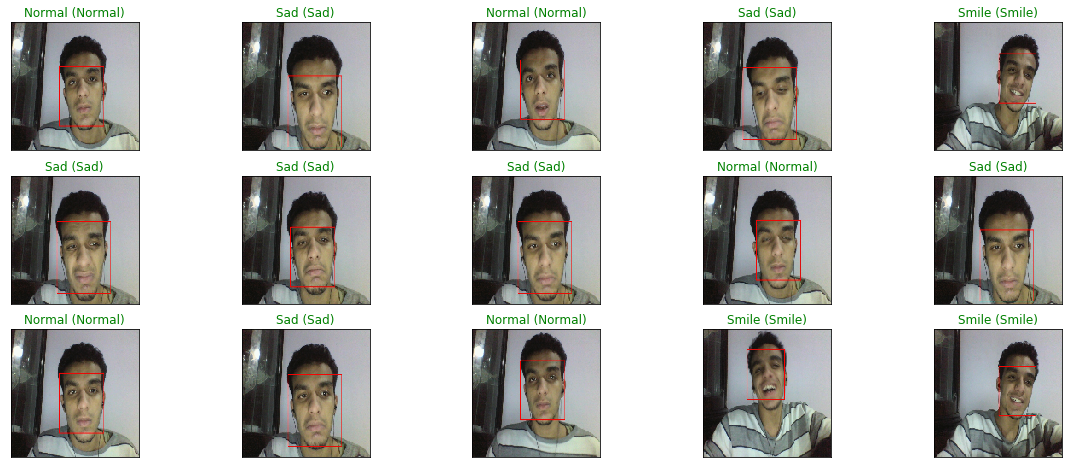

In [108]:
labels =[  # index 0
        "Normal",
        "Sad",
        "Smile"
        ]

y_hat = model.predict([X_data])


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()